## Midterm 2 - MNIST Classification
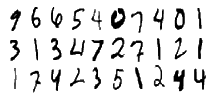
### Preparing environment and dataset:
* pip install python-mnist
* create folder midterm/data
* download from https://drive.google.com/open?id=1AQwyy3xP7rjDWMPkWBW4kKOfpkIyAWt8 - 4 files
* extract all files to ./data

#### The error of your classifier on test dataset must be better then 12.0% LeCun et al. 1998
#### Enter your error at https://goo.gl/forms/JRDKcotcXf5LZM3I3
#### Commit your code to github/bitbucket into folder midterm


In [10]:
from mnist import MNIST
import random
mndata = MNIST('.//data')

trimages, trlabels = mndata.load_training()
teimages, telabels = mndata.load_testing()
index = random.randrange(0, len(trimages))  # choose an index ;-)
print('The amount of train images',len(trimages))
print('The amount of test images',len(trimages))
print('The label of random image',trlabels[index],'The random image is',mndata.display(trimages[index]))
print('Images are binary with 28*28 = ',len(trimages[index]))

('The amount of train images', 60000)
('The amount of test images', 60000)
('The label of random image', 9, 'The random image is', '\n............................\n............................\n............................\n............................\n............................\n............................\n.................@@.........\n...............@@@@@........\n.............@@....@........\n.............@.....@@.......\n...........@@......@........\n...........@......@@........\n..........@.......@@........\n.........@@......@@.........\n........@@.......@..........\n........@.......@@..........\n........@......@@...........\n.......@@......@............\n.......@@....@@@............\n........@@.@@@@.............\n.........@@@.@@.............\n.............@..............\n.............@..............\n............@@..............\n............@...............\n............@...............\n............................\n............................')
('Images are binary with 

In [19]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import idx2numpy
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import regularizers
from keras import metrics
from keras.utils.np_utils import to_categorical
from keras import optimizers
from scipy import misc
DATA_PATH = 'data/'

X_train = idx2numpy.convert_from_file(DATA_PATH + 'train-images-idx3-ubyte')
Y_train = idx2numpy.convert_from_file(DATA_PATH + 'train-labels-idx1-ubyte')
X_test = idx2numpy.convert_from_file(DATA_PATH + 't10k-images-idx3-ubyte')
Y_test = idx2numpy.convert_from_file(DATA_PATH + 't10k-labels-idx1-ubyte')

# reshape the data so as to fit the format of (samples, height, width, channels)
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

Y_train = Y_train.reshape(60000)
Y_test = Y_test.reshape(10000)

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)


model = Sequential()

model.add(Conv2D(filters=20, kernel_size=(6,6), kernel_regularizer=regularizers.l2(0.04), strides=(1,1), padding='valid', activation='relu', data_format='channels_last', input_shape=(28,28,1)))
model.add(Conv2D(filters=20, kernel_size=(3,3), kernel_regularizer=regularizers.l2(0.04), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4), strides=(1,1)))
model.add(Dropout(rate=0.05,seed=3))

model.add(Conv2D(filters=10, kernel_size=(6,6), kernel_regularizer=regularizers.l2(0.04), strides=(1,1), padding='valid', activation='relu'))
model.add(Conv2D(filters=10, kernel_size=(3,3), kernel_regularizer=regularizers.l2(0.04), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4), strides=(1,1)))
model.add(Dropout(rate=0.05,seed=8))
model.add(Flatten())

model.add(Dense(units=30, activation='tanh', kernel_regularizer=regularizers.l2(0.04)))
model.add(Dense(units=10, activation='softmax', kernel_regularizer=regularizers.l2(0.04)))

# MODEL COMPILATION
sgd = optimizers.SGD(lr=0.003) 

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=[metrics.categorical_accuracy])

# MODEL FIT
model.fit(X_train, Y_train, epochs=6, batch_size=100)


# MODEL EVALUATION
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=10)
print("\nAccuracy on test data : ", test_accuracy*100)
print("\nLoss on test data : ", test_loss)

# manually end the session to avoid occasional exceptions while running the program
from keras import backend as K
K.clear_session()

Epoch 1/6
60000/60000 [==============================] - 111s 2ms/step - loss: 5.7035 - categorical_accuracy: 0.5213
Epoch 2/6
60000/60000 [==============================] - 108s 2ms/step - loss: 3.7641 - categorical_accuracy: 0.9042
Epoch 3/6
60000/60000 [==============================] - 104s 2ms/step - loss: 2.8749 - categorical_accuracy: 0.9457
Epoch 4/6
60000/60000 [==============================] - 107s 2ms/step - loss: 2.2577 - categorical_accuracy: 0.9589
Epoch 5/6
60000/60000 [==============================] - 109s 2ms/step - loss: 1.8241 - categorical_accuracy: 0.9658
Epoch 6/6
10000/10000 [==============================] - 7s 674us/step
('\nAccuracy on test data : ', 97.82999963164329)
('\nLoss on test data : ', 1.3470134127140045)
